In [ ]:
#Program to find cosine similarity, uses co-occurence matrix for creating word embeddings

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from itertools import product

In [2]:
# Example sentences
sentences = [
    "I love natural language processing",
    "Language processing is fascinating"
]

In [3]:
# Preprocess sentences: tokenize and lowercase
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

In [4]:
# Build the vocabulary
vocab = sorted(set(word for sentence in tokenized_sentences for word in sentence))

In [5]:
# Initialize the co-occurrence matrix
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

In [6]:
# Window size for context words
window_size = 1

In [7]:
# Fill the co-occurrence matrix
for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):
        word_idx = vocab.index(word)
        start = max(0, i - window_size)
        end = min(len(sentence), i + window_size + 1)
        context = sentence[start:i] + sentence[i+1:end]
        
        for context_word in context:
            context_idx = vocab.index(context_word)
            co_occurrence_matrix[word_idx, context_idx] += 1

In [8]:
# Create document vectors by summing the word vectors
doc_vectors = np.zeros((len(sentences), len(vocab)))
for i, sentence in enumerate(tokenized_sentences):
    for word in sentence:
        word_idx = vocab.index(word)
        doc_vectors[i] += co_occurrence_matrix[word_idx]

In [9]:
# Normalize document vectors
doc_vectors = np.array([vec / np.linalg.norm(vec) for vec in doc_vectors])

In [10]:
# Calculate cosine similarity
similarity = cosine_similarity(doc_vectors)

In [11]:
print("Vocabulary:", vocab)
print("\nCo-occurrence Matrix:\n", co_occurrence_matrix)
print("\nDocument Vectors:\n", doc_vectors)
print("\nCosine Similarity:\n", similarity)

Vocabulary: ['fascinating', 'i', 'is', 'language', 'love', 'natural', 'processing']

Co-occurrence Matrix:
 [[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 2.]
 [0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 2. 0. 0. 0.]]

Document Vectors:
 [[0.         0.20851441 0.20851441 0.62554324 0.41702883 0.41702883
  0.41702883]
 [0.22941573 0.         0.45883147 0.45883147 0.         0.22941573
  0.6882472 ]]

Cosine Similarity:
 [[1.        0.7653838]
 [0.7653838 1.       ]]


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

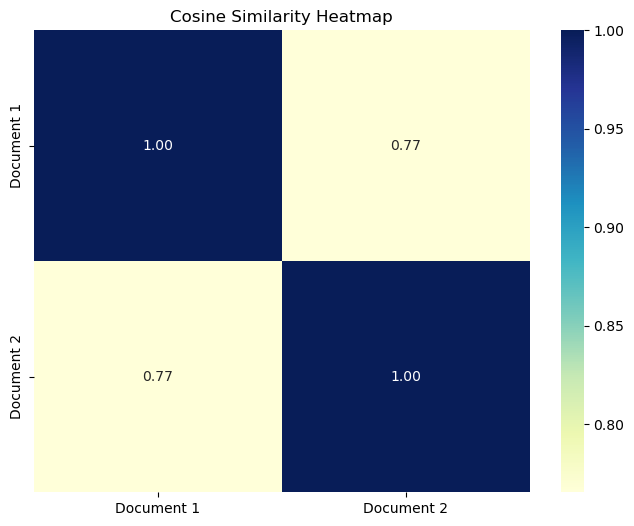

In [13]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True, 
            xticklabels=['Document 1', 'Document 2'], yticklabels=['Document 1', 'Document 2'])
plt.title('Cosine Similarity Heatmap')
plt.show()

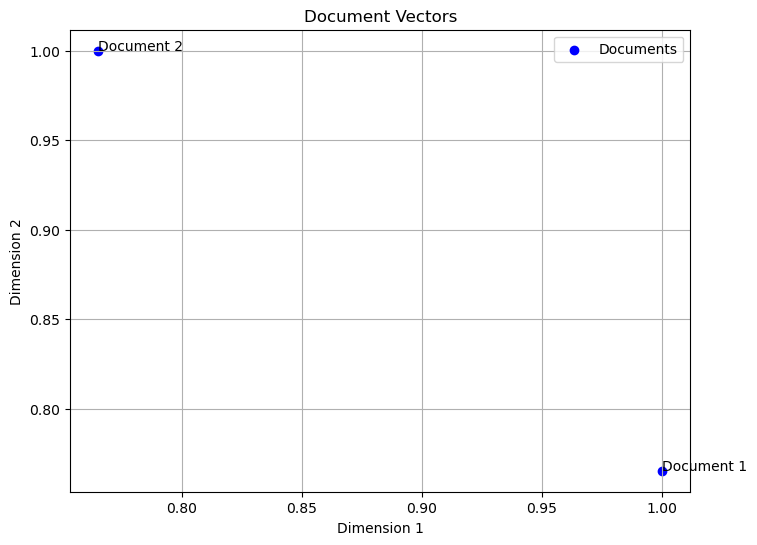

In [14]:
# Plot the document vectors
plt.figure(figsize=(8, 6))
plt.scatter(similarity[:, 0], similarity[:, 1], color='blue', label='Documents')
for i, txt in enumerate(['Document 1', 'Document 2']):
    plt.annotate(txt, (similarity[i, 0], similarity[i, 1]))

plt.title('Document Vectors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.legend()
plt.show()